# Positivity Violations Explorer
Scan coupling and temperature to detect where Bloch-Redfield yields negative eigenvalues (non-CP dynamics).

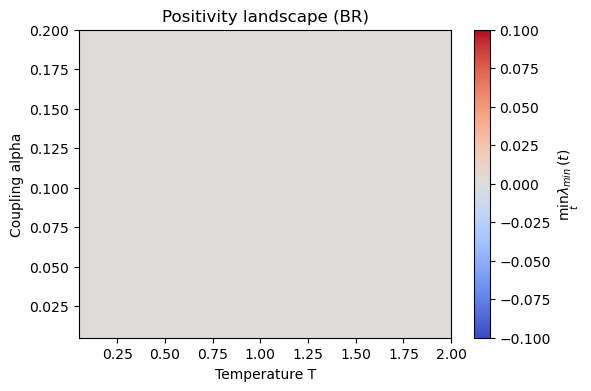

In [2]:
import numpy as np

from qutip import basis, sigmax, sigmaz, brmesolve, OhmicEnvironment

from diagnostics import trajectory_min_eigs

import matplotlib.pyplot as plt

w0=1.0

H=0.5*w0*sigmaz()

A=sigmax()  # transverse coupling for relaxation + dephasing

alphas=np.linspace(0.005,0.2,20)

temps=np.linspace(0.05,2.0,25)

tlist=np.linspace(0,5,150)

res_grid=np.zeros((len(alphas),len(temps)))

psi0=basis(2,1)

for ia,a in enumerate(alphas):

    for it,T in enumerate(temps):

        bath=OhmicEnvironment(T=T, wc=10.0, alpha=a, s=1.0)

        sol=brmesolve(H, psi0, tlist, a_ops=[[A,bath]])

        min_eigs=trajectory_min_eigs(sol.states)

        res_grid[ia,it]=min(min_eigs)

plt.figure(figsize=(6,4))

im=plt.imshow(res_grid,origin='lower',aspect='auto',extent=[temps[0],temps[-1],alphas[0],alphas[-1]],cmap='coolwarm')

plt.colorbar(im,label=r'$\min_t \lambda_{min}(t)$')

plt.contour(temps, alphas, res_grid, levels=[0], colors='k', linewidths=1) 

plt.xlabel('Temperature T')

plt.ylabel('Coupling alpha')

plt.title('Positivity landscape (BR)')

plt.show()